<a href="https://www.kaggle.com/code/ayushs9020/function-transformers-from-scratch-in-python?scriptVersionId=128513116" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# 1 | Function Transformer

So what is a transformer ??. And why do we really need that??

**What** - A transformer basically is a `function` which `changes` the `input` into a `normal ditribution/Gaussian Distribution`

**If you dont know what is Gaussian Distribution, Dont worry, Just go through the notebook :)**

**Modules**
* Numpy
* Pandas
* Matplotlib
* Seaborn

# 2 | What other thigns we will learn
* Skewness
* Gaussian Curve/Normal Distribution Curve
* Vertical Stacking In Numpy
* Horizontal Stacking In Numpy
* Why we use `np.log1p()` instead of `np.log()`
* Limitation Of Box Cox Transformer
* `ow Box-Cox`Becomes the Generalized Case of `Log Transformer`

In [1]:
from IPython.display import IFrame

In [2]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Lets assume we have data like this 

In [4]:
data = pd.read_csv("/kaggle/input/titanic/train.csv")

And it looks like this 

In [5]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


`Fare` seems to be a good one for this, so we will be focusing on this

In [6]:
sample_data = data["Fare"]

# 2.1 | Skewness
So what is this skewness???

Lets assume we have an array like this.. 

In [7]:
sample_array = np.array([x**2 for x in range(200)])

In [8]:
sample_array

array([    0,     1,     4,     9,    16,    25,    36,    49,    64,
          81,   100,   121,   144,   169,   196,   225,   256,   289,
         324,   361,   400,   441,   484,   529,   576,   625,   676,
         729,   784,   841,   900,   961,  1024,  1089,  1156,  1225,
        1296,  1369,  1444,  1521,  1600,  1681,  1764,  1849,  1936,
        2025,  2116,  2209,  2304,  2401,  2500,  2601,  2704,  2809,
        2916,  3025,  3136,  3249,  3364,  3481,  3600,  3721,  3844,
        3969,  4096,  4225,  4356,  4489,  4624,  4761,  4900,  5041,
        5184,  5329,  5476,  5625,  5776,  5929,  6084,  6241,  6400,
        6561,  6724,  6889,  7056,  7225,  7396,  7569,  7744,  7921,
        8100,  8281,  8464,  8649,  8836,  9025,  9216,  9409,  9604,
        9801, 10000, 10201, 10404, 10609, 10816, 11025, 11236, 11449,
       11664, 11881, 12100, 12321, 12544, 12769, 12996, 13225, 13456,
       13689, 13924, 14161, 14400, 14641, 14884, 15129, 15376, 15625,
       15876, 16129,

If we see how it looks 

<AxesSubplot:ylabel='Density'>

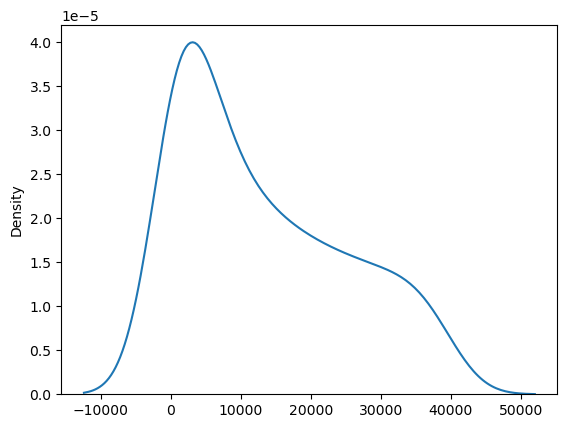

In [9]:
sns.kdeplot(sample_array)

You can see this `sample_array` is `slightly shifted towards left`, it looks like a steep sofa 

**Machine Learning do not like data like this, it kinda of hates it. I know machine cant tell us that it hates or loves, but belive me, it came to me and told me this :)**

It also told me what it likes

So as it is our own machine it is our responisbility to keep it happy.

**So our main goal is to convert this data into a data that machine likes.**

But first of all what do machine likes???

It is the `Gaussian Curve` or `Normal Distribution Curve` that it like

Wait Wait Wait, What is Normal/Gaussian Distribution???

# 2.2 | Gaussian Distribution

A **Normal/Gaussian Distribution** is a distribution that is in a `bell like shape`.

![](https://www.googleapis.com/download/storage/v1/b/kaggle-forum-message-attachments/o/inbox%2F9711370%2F38caa1e7d9068632f24a8ec0c5f318fa%2F360_F_117733913_tSNSnfILeFniF4u7DmGE5HkFUTcA7XAr.jpg?generation=1678681913469594&alt=media)

Notice a bell like curve in all the graphs ? 

Computer and nature just likes these formations and datasets that make these. So our main focus is to make normal distributions. We can do this by using the fancy word `FunctionTransformer`

**Why** - Straight to the point, we use a `transformer` to `reduce` the `time complexity` of a model and `increase` its `accuracy`.

Now comes another question. How can we actually do this

**How** - So there are as usual two ways to implement the transformer

* **Using specialized libraries** - Obviously one of the all rounder library the `scikit-learn` gives us the ability to easily apply a transformer on any custom function you want 

* **Making your own transformer** - You can always make stuff by yourself, this gives you `a lot of understanding` of the `concept` and provides you a lot of `pseudo knowledge`.

So now you have a baisc Idea of what is `Skewness` and `Gaussian Curve`. 

Remeber we had taken a `sample_data`??

Lets try to calculate the skewness of that data

The skewness $sk$ of a data with $n$ values, having the mean $x_{mean}$ and standard deviation $\sigma$ can be given by 

$$sk = \frac {\sum\limits_{i = 1}^{n}(x_i - x_{mean})^3}{(n - 1)\sigma^3}$$

We dont need to worry about to apply the formula,`pandas` gives us the feasability to do so 

In [10]:
sample_data.skew()

4.787316519674893

Lets get a greater view of the skewness of the data 

<AxesSubplot:xlabel='Fare', ylabel='Density'>

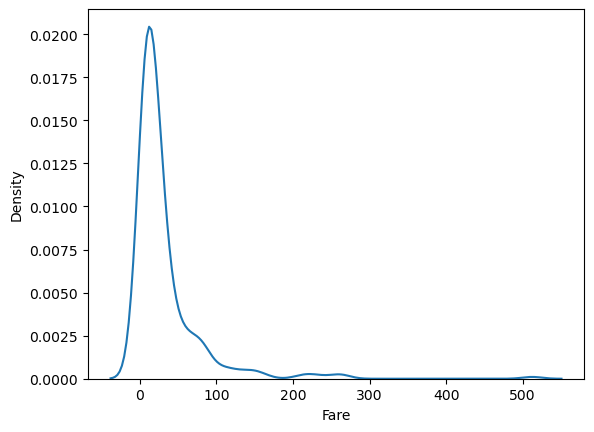

In [11]:
sns.kdeplot(sample_data)

As you can see the skewness is $4.78$, models like gaussian disitribution graph, so our main motive is to minimize the skewess and make the curve more like a bell shaped.

The first in the list is 
# Log Transformer

The transformer works on a simple formula 

$$f(x) = \Bigg [ \frac {log(x)}{log(x+1)}\frac {if}{if}\frac {x!=0}{x = 0}$$

In [12]:
IFrame("https://www.desmos.com/calculator/crequa4ti2" , 400 , 400)

For changing every value in an array, we simply need to iterate over the array and change the values. We will first try to access these values. As it can go very further, we will limit the output to $5$ lines

In [13]:
count = 0
for i in sample_data: #-----|
    print(i) #--------------|=======> Main code
    count +=1
    if count == 5:
        break

7.25
71.2833
7.925
53.1
8.05


Now we will try to make a new array, and add these values in that array, we will transform the values afterward, but first we will try to populate a new array 

This will give the following Error

```
new_array = np.array([])
for i in sample_data:
    new_array = np.vstack([new_array , i])
    
---------------------------------------------------------------------------
ValueError                                Traceback (most recent call last)
/tmp/ipykernel_27/1678135359.py in <module>
      1 new_array = np.array([])
      2 for i in sample_data:
----> 3     new_array = np.vstack([new_array , i])

<__array_function__ internals> in vstack(*args, **kwargs)

/opt/conda/lib/python3.7/site-packages/numpy/core/shape_base.py in vstack(tup)
    280     if not isinstance(arrs, list):
    281         arrs = [arrs]
--> 282     return _nx.concatenate(arrs, 0)
    283 
    284 

<__array_function__ internals> in concatenate(*args, **kwargs)

ValueError: all the input array dimensions for the concatenation axis must match exactly, but along dimension 1, the array at index 0 has size 0 and the array at index 1 has size 1
```

As we can see there is an error, regarding the incorrect shape. It says the array you are trying to stack is of $(1 , 1)$ but the arrays you are trying to stck in is of shape $(0 , 0)$. 

So we need to make an empty array of the same shape.

In [14]:
new_array = np.empty(shape = (1 , 1))
for i in sample_data:
    new_array = np.vstack([new_array , i])

In [15]:
new_array

array([[  0.    ],
       [  7.25  ],
       [ 71.2833],
       [  7.925 ],
       [ 53.1   ],
       [  8.05  ],
       [  8.4583],
       [ 51.8625],
       [ 21.075 ],
       [ 11.1333],
       [ 30.0708],
       [ 16.7   ],
       [ 26.55  ],
       [  8.05  ],
       [ 31.275 ],
       [  7.8542],
       [ 16.    ],
       [ 29.125 ],
       [ 13.    ],
       [ 18.    ],
       [  7.225 ],
       [ 26.    ],
       [ 13.    ],
       [  8.0292],
       [ 35.5   ],
       [ 21.075 ],
       [ 31.3875],
       [  7.225 ],
       [263.    ],
       [  7.8792],
       [  7.8958],
       [ 27.7208],
       [146.5208],
       [  7.75  ],
       [ 10.5   ],
       [ 82.1708],
       [ 52.    ],
       [  7.2292],
       [  8.05  ],
       [ 18.    ],
       [ 11.2417],
       [  9.475 ],
       [ 21.    ],
       [  7.8958],
       [ 41.5792],
       [  7.8792],
       [  8.05  ],
       [ 15.5   ],
       [  7.75  ],
       [ 21.6792],
       [ 17.8   ],
       [ 39.6875],
       [  7.

So now our most of the work is done, now we just need to change the value of `i` according to our need, for simplicity we will just create a function for this 

In [16]:
log_output  = lambda value : np.log1p(value)

Noticed why we used `np.log1p()` instead of `np.log()`

This is because the case we cannot calculate the `log(0)`. 

Lets assume we have a `0` in our dataset. The function `np.log()`, will throw an error while trying to calculate `log(0)`. What `np.log1p()` do is, if it finds `0`, it adds one to it and then calculate the log, as `log(1)` is `0`. Neither the data changes nor we get obstructed 

In [17]:
new_array = np.empty(shape = (1 , 1))
for i in sample_data:
    new_array = np.vstack([new_array , log_output(i)])

In [18]:
new_array

array([[7.75      ],
       [2.1102132 ],
       [4.28059312],
       [2.18885633],
       [3.99083419],
       [2.20276476],
       [2.24689266],
       [3.9676942 ],
       [3.09444575],
       [2.49595374],
       [3.43626847],
       [2.87356464],
       [3.31600254],
       [2.20276476],
       [3.47429294],
       [2.18089192],
       [2.83321334],
       [3.40535539],
       [2.63905733],
       [2.94443898],
       [2.1071783 ],
       [3.29583687],
       [2.63905733],
       [2.20046377],
       [3.59731226],
       [3.09444575],
       [3.47777255],
       [2.1071783 ],
       [5.5759491 ],
       [2.18371146],
       [2.18557926],
       [3.3576216 ],
       [4.99396918],
       [2.1690537 ],
       [2.44234704],
       [4.42089632],
       [3.97029191],
       [2.1076888 ],
       [2.20276476],
       [2.94443898],
       [2.50484816],
       [2.34899147],
       [3.09104245],
       [2.18557926],
       [3.75136587],
       [2.18371146],
       [2.20276476],
       [2.803

So now what will be the skewness of our data???

In [19]:
pd.DataFrame(new_array).skew()

0    0.4935
dtype: float64

You might be thinking why we changed to dataframe, that was because numpy do not in built have a skew function, for the moment we will be using `pd.DataFrame().skew()`

Lets try to plot this on a graph

<AxesSubplot:ylabel='Density'>

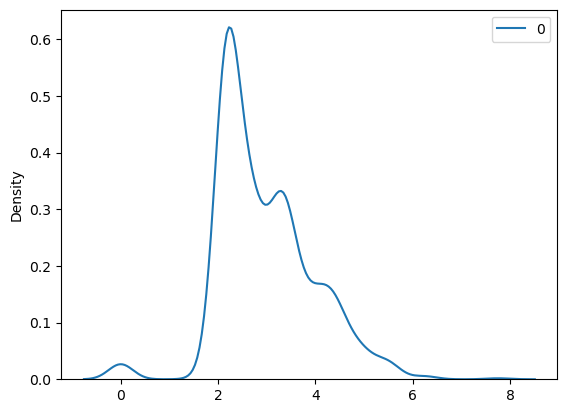

In [20]:
sns.kdeplot(new_array)

Notie how the graph changed, and the skewness is close to zero

Now as we have created our transformer, we will be adding some functionalities to the transformer like 
* iterating over a list

For this dummy we will be adding the `Age` column too. 

In [21]:
sample_data = data[["Fare" , "Age"]]

#################
Skewness is :  4.787316519674893


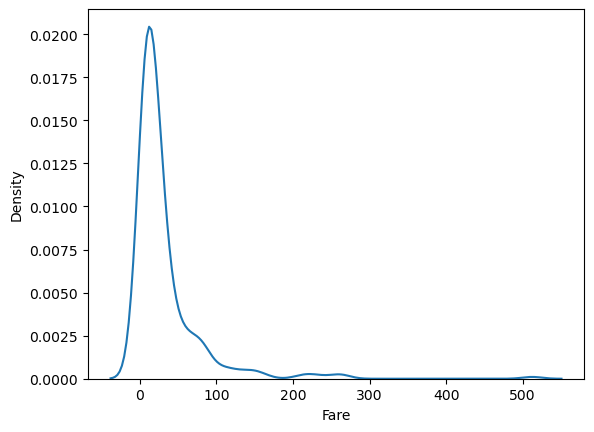

#################
Skewness is :  0.38910778230082704


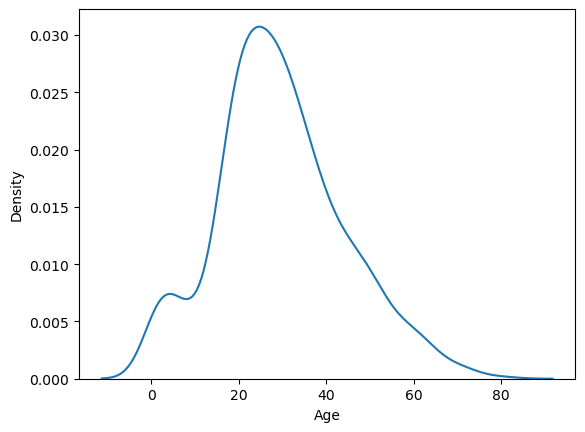

In [22]:
for i in sample_data.columns:
    print("#################")
    print("Skewness is : " , sample_data[i].skew())
    sns.kdeplot(sample_data[i])
    plt.show()

As we can see the skewness of the column age is already good, but it will still help to improve our transformer. Lets try to iterate firstly over these columns

In [23]:
for i in sample_data:
    print(i)

Fare
Age


Now we will add both our codes

In [24]:
def log_output(value):
    return np.log1p(value)

for i in sample_data:
    new_array = np.empty(shape = (1 , 1))
    for j in sample_data[i]:
        new_array = np.vstack([new_array , log_output(j)])

    new_array = np.delete(new_array , 0 , 0)

But there is a problem, we are not actually generating output with two different array, we are just overalpping the output of these two.

We need to horizonatally stack the arrays to get an output. For this we will be using `np.hstack` and making a new empty array 

This will give error

```
def log_output(value):
    return np.log1p(value)

output_array = np.array([])
for i in sample_data:
    new_array = np.empty(shape = (1 , 1))
    for j in sample_data[i]:
        new_array = np.vstack([new_array , log_output(j)])

    new_array = np.delete(new_array , 0 , 0)

    output_array = np.hstack([output_array , new_array])

---------------------------------------------------------------------------
ValueError                                Traceback (most recent call last)
/tmp/ipykernel_27/3507604147.py in <module>
     10     new_array = np.delete(new_array , 0 , 0)
     11 
---> 12     output_array = np.hstack([output_array , new_array])

<__array_function__ internals> in hstack(*args, **kwargs)

/opt/conda/lib/python3.7/site-packages/numpy/core/shape_base.py in hstack(tup)
    341     # As a special case, dimension 0 of 1-dimensional arrays is "horizontal"
    342     if arrs and arrs[0].ndim == 1:
--> 343         return _nx.concatenate(arrs, 0)
    344     else:
    345         return _nx.concatenate(arrs, 1)

<__array_function__ internals> in concatenate(*args, **kwargs)

ValueError: all the input arrays must have same number of dimensions, but the array at index 0 has 1 dimension(s) and the array at index 1 has 2 dimension(s)
```

We got the same error as before, for this we just need to change the shape to $(1 , 1)$

This will gice error 

```
def log_output(value):
    return np.log1p(value)

output_array = np.empty(shape = (1 , 1))
for i in sample_data:
    new_array = np.empty(shape = (1 , 1))
    for j in sample_data[i]:
        new_array = np.vstack([new_array , log_output(j)])

    new_array = np.delete(new_array , 0 , 0)

    output_array = np.hstack([output_array , new_array])
    
---------------------------------------------------------------------------
ValueError                                Traceback (most recent call last)
/tmp/ipykernel_27/2164085260.py in <module>
     10     new_array = np.delete(new_array , 0 , 0)
     11 
---> 12     output_array = np.hstack([output_array , new_array])

<__array_function__ internals> in hstack(*args, **kwargs)

/opt/conda/lib/python3.7/site-packages/numpy/core/shape_base.py in hstack(tup)
    343         return _nx.concatenate(arrs, 0)
    344     else:
--> 345         return _nx.concatenate(arrs, 1)
    346 
    347 

<__array_function__ internals> in concatenate(*args, **kwargs)

ValueError: all the input array dimensions for the concatenation axis must match exactly, but along dimension 0, the array at index 0 has size 1 and the array at index 1 has size 891
```

Opps the same error again, but the size demand is now of $(891 , 1)$, wait wait wait, we have seen this somewhere else.

This is the actual size of the array we passes, so in short we need to make an empty array of this shape, lets try this now 

In [25]:
def log_output(value):
    return np.log1p(value)

output_array = np.empty(shape = sample_data.shape)
for i in sample_data:
    new_array = np.empty(shape = (1 , 1))
    for j in sample_data[i]:
        new_array = np.vstack([new_array , log_output(j)])

    new_array = np.delete(new_array , 0 , 0)

    output_array = np.hstack([output_array , new_array])

And now it works good, lets see this in a form of a dataframe

In [26]:
output_array_df = pd.DataFrame(output_array)

In [27]:
output_array_df

,0,1,2,3
0,6.232348e-310,6.232348e-310,2.110213,3.135494
1,5.014125e-310,5.014125e-310,4.280593,3.663562
2,NaN,NaN,2.188856,3.295837
3,NaN,NaN,3.990834,3.583519
4,NaN,NaN,2.202765,3.583519
...,...,...,...,...
886,NaN,NaN,2.639057,3.332205
887,NaN,NaN,3.433987,2.995732
888,NaN,NaN,3.196630,NaN
889,NaN,NaN,3.433987,3.295837


Wait this is now what we expected, Why there are $4$ column, instead of $2$. 

This is because we are again stacking the arrays, not replacing them, so we need to drop these values with each iteration 

In [28]:
def log_output(value):
    return np.log1p(value)

output_array = np.empty(shape = sample_data.shape)
for i in sample_data:
    new_array = np.empty(shape = (1 , 1))
    for j in sample_data[i]:
        new_array = np.vstack([new_array , log_output(j)])

    new_array = np.delete(new_array , 0 , 0)

    output_array = np.hstack([output_array , new_array])
    output_array = np.delete(output_array , 0 , 1)

In [29]:
output_array_df = pd.DataFrame(output_array)
output_array_df

,0,1
0,2.110213,3.135494
1,4.280593,3.663562
2,2.188856,3.295837
3,3.990834,3.583519
4,2.202765,3.583519
...,...,...
886,2.639057,3.332205
887,3.433987,2.995732
888,3.196630,NaN
889,3.433987,3.295837


And we got the pergect value, lets try to plot this on a graph now 

Skewness is :  0.3949280095189306


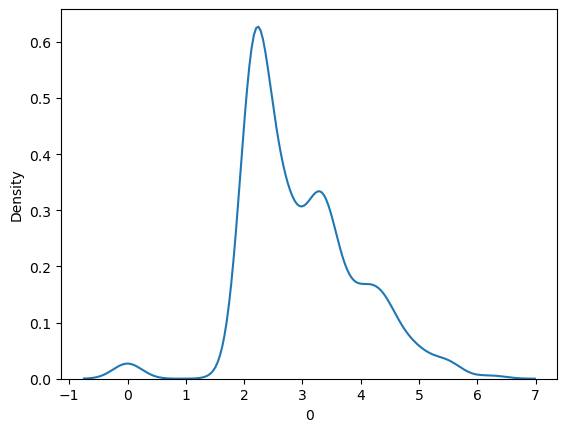

Skewness is :  -1.8774882259647614


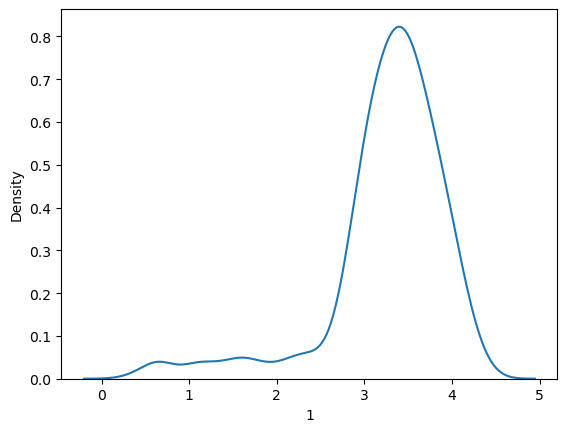

In [30]:
for i in output_array_df.columns:
    print("Skewness is : " , output_array_df[i].skew())
    sns.kdeplot(output_array_df[i])
    plt.show()

Notice how the skewness in `Age` actually got worse, So the function transformer always do not works best on all the scenarios, we need to specify where to put the transformer and where to not 

Now lets just do a little bit of beautifying 

In [31]:
def log_output(value):
    return np.log1p(value)

def function_transformer(array):

    output_array = np.empty(shape = array.shape)

    if len(array.shape) == 1:
        new_array = np.empty(shape = (1 , 1))
        for i in array:
            new_array = np.vstack([new_array , log_output(i)])

        new_array = np.delete(new_array , 0 , 0)

        return new_array

    else :
        for i in array:
        
            new_array = np.empty(shape = (1 , 1))
        
            for j in array[i]:
        
                new_array = np.vstack([new_array , log_output(j)])

            new_array = np.delete(new_array , 0 , 0)

            output_array = np.hstack([output_array , new_array])
            output_array = np.delete(output_array , 0 , 1)

        return output_array

Now as we have created a general function we just need to add its types 

# Square Transformer 
This also comes with a single formula 

$$f(x) = x^2$$

For making a sqaure transformer, we only need to define a function, and put a if a condition, wethere to use the log function or the square transformer

In [32]:
def log(value):
    return np.log1p(value)

def square(value):
    return np.sqaure(value)

def function_transformer(array , func = None):

    if func == None:
        print("Please enter a function")
        return None

    elif func == "log" or func == "square":

        output_array = np.empty(shape = array.shape)

        if len(array.shape) == 1:
            new_array = np.empty(shape = (1 , 1))
            for i in array:

                if func == "log":

                    new_array = np.vstack([new_array , log_output(i)])
                
                else:
                    
                    new_array = np.vstack([new_array , square(i)])
            
            new_array = np.delete(new_array , 0 , 0)

            return new_array

        else :
            
            for i in array:
            
                new_array = np.empty(shape = (1 , 1))
            
                for j in array[i]:
            
                    if func == "log":

                        new_array = np.vstack([new_array , log_output(i)])
                    else:
                    
                        new_array = np.vstack([new_array , square(i)])

                new_array = np.delete(new_array , 0 , 0)

                output_array = np.hstack([output_array , new_array])
                output_array = np.delete(output_array , 0 , 1)

            return output_array
    else:
        print("Please enter a valid function")
        return None

# Box-Cox Transformer

In this we try a series of values and find the skewness at every value and then return the bestest one 

 $$ x_λ = \displaystyle \Bigg[\frac {\frac {x^{\lambda} - 1}{λ}}{log (x) } \frac {if}{if} \frac {λ != 0}{λ = 0}\Bigg]$$

 Geneally we try to find the value of $\lambda$ which minimizes the skewness, $\lambda$ depends upon the data, but generally its value lies between -5 to 5

First lets try to work on one array and then we will expand to multiple arrays 

In [33]:
sample_data = data["Fare"]

As the value lies between $(-5 , 5)$, We will first try to make transformer basesd on only range of $(-5 , 5)$. We simply need to iterate over a loop of this

In [34]:
for i in range(-5 , 5):
    print(i)

-5
-4
-3
-2
-1
0
1
2
3
4


Now we will try to populate a list of arrays which are populated corresponding to different values of $\lambda$, at this time we are not making changes, we are just trying to populate the array  

In [35]:
array_list = []

for i in range(-5 , 5):
    
    new_array = np.empty(shape = (1 , 1))

    for j in sample_data:

        new_array = np.vstack([new_array , j])

    new_array = np.delete(new_array , 0 , 0)

    array_list.append(new_array)

In [36]:
array_list

[array([[  7.25  ],
        [ 71.2833],
        [  7.925 ],
        [ 53.1   ],
        [  8.05  ],
        [  8.4583],
        [ 51.8625],
        [ 21.075 ],
        [ 11.1333],
        [ 30.0708],
        [ 16.7   ],
        [ 26.55  ],
        [  8.05  ],
        [ 31.275 ],
        [  7.8542],
        [ 16.    ],
        [ 29.125 ],
        [ 13.    ],
        [ 18.    ],
        [  7.225 ],
        [ 26.    ],
        [ 13.    ],
        [  8.0292],
        [ 35.5   ],
        [ 21.075 ],
        [ 31.3875],
        [  7.225 ],
        [263.    ],
        [  7.8792],
        [  7.8958],
        [ 27.7208],
        [146.5208],
        [  7.75  ],
        [ 10.5   ],
        [ 82.1708],
        [ 52.    ],
        [  7.2292],
        [  8.05  ],
        [ 18.    ],
        [ 11.2417],
        [  9.475 ],
        [ 21.    ],
        [  7.8958],
        [ 41.5792],
        [  7.8792],
        [  8.05  ],
        [ 15.5   ],
        [  7.75  ],
        [ 21.6792],
        [ 17.8   ],


So new we have a list of arrays, lets populate another list, which is having the skewness of the array 

In [37]:
array_list = []
skew_list = []

for i in range(-5 , 5):
    
    new_array = np.empty(shape = (1 , 1))

    for j in sample_data:

        new_array = np.vstack([new_array , j])

    new_array = np.delete(new_array , 0 , 0)
    
    array_list.append(new_array)
    skew_list.append(pd.DataFrame(new_array).skew())

In [38]:
skew_list

[0    4.787317
 dtype: float64,
 0    4.787317
 dtype: float64,
 0    4.787317
 dtype: float64,
 0    4.787317
 dtype: float64,
 0    4.787317
 dtype: float64,
 0    4.787317
 dtype: float64,
 0    4.787317
 dtype: float64,
 0    4.787317
 dtype: float64,
 0    4.787317
 dtype: float64,
 0    4.787317
 dtype: float64]

Notice all the values are same, this is beacuase we have not put any changes in the values, we will put them afterwards. 

So `skew_list` is just a series object, but we want only skewness, for this we will use the `[0]` index

In [39]:
array_list = []
skew_list = []

for i in range(-5 , 5):
    
    new_array = np.empty(shape = (1 , 1))

    for j in sample_data:

        new_array = np.vstack([new_array , j])

    new_array = np.delete(new_array , 0 , 0)
    
    array_list.append(new_array)
    skew_list.append(pd.DataFrame(new_array).skew()[0])

In [40]:
skew_list

[4.787316519674893,
 4.787316519674893,
 4.787316519674893,
 4.787316519674893,
 4.787316519674893,
 4.787316519674893,
 4.787316519674893,
 4.787316519674893,
 4.787316519674893,
 4.787316519674893]

As we have the list of skenwess at different values of $\lambda$, we just need to find the index of the smallest value, and we can find the corresponding index to the array list, to find the corresponding array 

In [41]:
array_list = []
skew_list = []

for i in range(-5 , 5):
    
    new_array = np.empty(shape = (1 , 1))

    for j in sample_data:

        new_array = np.vstack([new_array , j])

    new_array = np.delete(new_array , 0 , 0)
    
    array_list.append(new_array)
    skew_list.append(pd.DataFrame(new_array).skew()[0])

    output = array_list[np.argmin(skew_list)]

In [42]:
output

array([[  7.25  ],
       [ 71.2833],
       [  7.925 ],
       [ 53.1   ],
       [  8.05  ],
       [  8.4583],
       [ 51.8625],
       [ 21.075 ],
       [ 11.1333],
       [ 30.0708],
       [ 16.7   ],
       [ 26.55  ],
       [  8.05  ],
       [ 31.275 ],
       [  7.8542],
       [ 16.    ],
       [ 29.125 ],
       [ 13.    ],
       [ 18.    ],
       [  7.225 ],
       [ 26.    ],
       [ 13.    ],
       [  8.0292],
       [ 35.5   ],
       [ 21.075 ],
       [ 31.3875],
       [  7.225 ],
       [263.    ],
       [  7.8792],
       [  7.8958],
       [ 27.7208],
       [146.5208],
       [  7.75  ],
       [ 10.5   ],
       [ 82.1708],
       [ 52.    ],
       [  7.2292],
       [  8.05  ],
       [ 18.    ],
       [ 11.2417],
       [  9.475 ],
       [ 21.    ],
       [  7.8958],
       [ 41.5792],
       [  7.8792],
       [  8.05  ],
       [ 15.5   ],
       [  7.75  ],
       [ 21.6792],
       [ 17.8   ],
       [ 39.6875],
       [  7.8   ],
       [ 76.

As now we have the array with the lowest skweness, We can make changes in how the array is processed on the basis of $\lambda$, lets make a function that take the valye of $\lambda$ and array, passes the output

This will give error 

```
def box_cox(value , lambdas):
    if lambdas == 0:
        return np.log1p(value)
    else :
        return (((value ** lambdas) - 1) / lambdas)

array_list = []
skew_list = []

for i in range(-5 , 5):
    
    new_array = np.empty(shape = (1 , 1))

    for j in sample_data:

        new_array = np.vstack([new_array , box_cox(j , i)])

    new_array = np.delete(new_array , 0 , 0)
    
    array_list.append(new_array)
    skew_list.append(pd.DataFrame(new_array).skew()[0])

    output = array_list[np.argmin(skew_list)]

---------------------------------------------------------------------------
ZeroDivisionError                         Traceback (most recent call last)
/tmp/ipykernel_27/1112742134.py in <module>
     14     for j in sample_data:
     15 
---> 16         new_array = np.vstack([new_array , box_cox(j , i)])
     17 
     18     new_array = np.delete(new_array , 0 , 0)

/tmp/ipykernel_27/1112742134.py in box_cox(value, lambdas)
      3         return np.log1p(value)
      4     else :
----> 5         return (((value ** lambdas) - 1) / lambdas)
      6 
      7 array_list = []

ZeroDivisionError: 0.0 cannot be raised to a negative power
```

Okay so we got an error related to $0$, box cox transformation have a limitation, that it connot be applied to a $0$, for here, we will just add $1$ to every number to overcome this 

In [43]:
def box_cox(value , lambdas):
    if lambdas == 0:
        return np.log1p(value)
    else :
        return ((((value + 1) ** lambdas) - 1) / lambdas)

array_list = []
skew_list = []

for i in range(-5 , 5):
    
    new_array = np.empty(shape = (1 , 1))

    for j in sample_data:

        new_array = np.vstack([new_array , box_cox(j , i)])

    new_array = np.delete(new_array , 0 , 0)
    
    array_list.append(new_array)
    skew_list.append(pd.DataFrame(new_array).skew()[0])

    output = array_list[np.argmin(skew_list)]

In [44]:
skew_list

[-7.523805402951357,
 -7.523798716363805,
 -7.523429871739085,
 -7.5010330775662295,
 -6.3574300087139735,
 0.3949280095189306,
 4.787316519674893,
 11.895617693803503,
 15.681022393085755,
 16.79858313851453]

Notice the change in values, but there is still a problem, let me show you

In [45]:
np.argmin(skew_list)

0

The index should be $5$ but is $0$, We need to make this values positive, still not actually changing them, we can do this by squaring every value

In [46]:
def box_cox(value , lambdas):
    if lambdas == 0:
        return np.log1p(value)
    else :
        return ((((value + 1) ** lambdas) - 1) / lambdas)

array_list = []
skew_list = []

for i in range(-5 , 5):
    
    new_array = np.empty(shape = (1 , 1))

    for j in sample_data:

        new_array = np.vstack([new_array , box_cox(j , i)])

    new_array = np.delete(new_array , 0 , 0)
    
    array_list.append(new_array)
    skew_list.append(pd.DataFrame(new_array).skew()[0] ** 2)

    output = array_list[np.argmin(skew_list)]

In [47]:
skew_list

[56.60764774148003,
 56.60754712435764,
 56.60199703497598,
 56.2654972307427,
 40.41691631569695,
 0.15596813270258453,
 22.91839945955213,
 141.50572031713097,
 245.8944632924569,
 282.1923954615847]

Notice one thing ???

Here the lowest value is at the index `5` where $\lambda = 0$ means we are getting the lowest value when $\lambda = 0$ or when we apply $log(x)$, So we can interperet, that box-cox Transformer is just a generalized version of `Log Transformer` and most of the times it gives the best value at that particular point only 

In [48]:
np.argmin(skew_list)

5

Now we got our perfect output, now lets try to implement the same on a list of columns 

In [49]:
sample_data = data[["Fare" , "Age"]]

In [50]:
def box_cox(value , lambdas):
    if lambdas == 0:
        return np.log1p(value)
    else :
        return ((((value + 1) ** lambdas) - 1) / lambdas)



output_array = np.empty(shape = sample_data.shape)

if len(sample_data.shape) == 1:

    array_list = []
    skew_list = []
    
    for i in range(-5 , 5):
    
        new_array = np.empty(shape = (1 , 1))

        for j in sample_data:

            new_array = np.vstack([new_array , box_cox(j , i)])

        new_array = np.delete(new_array , 0 , 0)
        
        array_list.append(new_array)
        skew_list.append(pd.DataFrame(new_array).skew()[0] ** 2)

        output_array = array_list[np.argmin(skew_list)]
elif len(sample_data.shape) != 1:
    
    for k in sample_data:

        array_list = []
        skew_list = []
        
        for i in range(-5 , 5):
            
            new_array = np.empty(shape = (1 , 1))

            for j in sample_data[k]:

                new_array = np.vstack([new_array , box_cox(j , i)])

            new_array = np.delete(new_array , 0 , 0)
            
            array_list.append(new_array)
            skew_list.append(pd.DataFrame(new_array).skew()[0] ** 2)

            output = array_list[np.argmin(skew_list)]

        output_array = np.hstack([output_array , output])

        output_array = np.delete(output_array , 0 , 1)

In [51]:
output_array

array([[ 2.1102132 , 22.        ],
       [ 4.28059312, 38.        ],
       [ 2.18885633, 26.        ],
       ...,
       [ 3.19663022,         nan],
       [ 3.4339872 , 26.        ],
       [ 2.1690537 , 32.        ]])

Now lets just put everything into a function and name the valriables properly 

In [52]:
def box_cox(value , lambdas):
    if lambdas == 0:
        return np.log1p(value)
    else :
        return ((((value + 1) ** lambdas) - 1) / lambdas)


def func(array):
    output_array = np.empty(shape = array.shape)

    if len(array.shape) == 1:

        array_list = []
        skew_list = []
        
        for bc_constant in range(-5 , 5):
        
            new_array = np.empty(shape = (1 , 1))

            for values in array:

                new_array = np.vstack([new_array , box_cox(values , bc_constant)])

            new_array = np.delete(new_array , 0 , 0)
            
            array_list.append(new_array)
            skew_list.append(pd.DataFrame(new_array).skew()[0] ** 2)

            output_array = array_list[np.argmin(skew_list)]
        
        return output_array

    elif len(array.shape) != 1:

        for columns in array:

            array_list = []
            skew_list = []
            
            for bc_constant in range(-5 , 5):
                
                new_array = np.empty(shape = (1 , 1))

                for values in array[columns]:

                    new_array = np.vstack([new_array , box_cox(values , bc_constant)])

                new_array = np.delete(new_array , 0 , 0)
                
                array_list.append(new_array)
                skew_list.append(pd.DataFrame(new_array).skew()[0] ** 2)

                output = array_list[np.argmin(skew_list)]

            output_array = np.hstack([output_array , output])

            output_array = np.delete(output_array , 0 , 1)

        return output_array

    else :
        print("Please enter a valid input")

# Yeo Johnson Transformer

In this we try a series of values and find the skewness at every value and then return the bestest one

$$f(x) = \Bigg [
            \frac 
                {\frac 
                    {[(x + 1)^{\lambda} - 1]\lambda}
                    {log(x) + 1}}
                {\frac 
                    {\frac 
                        {-[(-x + 1)^2]^{2 - \lambda}}
                        {2 - \lambda}}
                    {-log(-x+1)}}
            \frac 
                {\frac 
                    {if}
                    {if}}
                {\frac 
                    {if}
                    {if}}
            \frac 
                {\frac 
                    {\lambda != 0}
                    {\lambda = 0}}
                {\frac 
                    {\lambda != 2}
                    {\lambda = 2}}
            \frac 
                {\frac 
                    {and}
                    {and}}
                {\frac 
                    {and}
                    {and}}
            \frac 
                {\frac
                    {x>=0}
                    {x>=}}
                {\frac 
                    {x<0}
                    {x<0}}$$

As we created the function and formuals for `box-cox` transformer, we will do the same here.

In [53]:
def yeo_johnson(value , lambdas):
    if value >= 0:
        if lambdas == 0:
            return (np.log1p(value))
        else:
            return ((((value + 1) ** lambdas) - 1) / lambdas)
    if value < 0:
        if lambdas == 2: 
            return (-np.log1p(-value))
        else : 
            return ((- ((((- value) + 1) ** 2 - lambdas) - 1)) / (2 - lambdas))

def box_cox(value , lambdas):
    if lambdas == 0:
        return np.log1p(value)
    else :
        return ((((value + 1) ** lambdas) - 1) / lambdas)


def func(array , fun = None):
    
    output_array = np.empty(shape = array.shape)

    if len(array.shape) == 1:

        array_list = []
        skew_list = []
        
        for constant in range(-5 , 5):
        
            new_array = np.empty(shape = (1 , 1))

            for values in array:

                if fun == "box_cox":

                    new_array = np.vstack([new_array , box_cox(values , constant)])

                else :
                    new_array = np.vstack([new_array , yeo_johnson(values , constant)])
            
            new_array = np.delete(new_array , 0 , 0)
            
            array_list.append(new_array)
            skew_list.append(pd.DataFrame(new_array).skew()[0] ** 2)

            output_array = array_list[np.argmin(skew_list)]
        
        return output_array

    elif len(array.shape) != 1:

        for columns in array:

            array_list = []
            skew_list = []
            
            for constant in range(-5 , 5):
                
                new_array = np.empty(shape = (1 , 1))

                for values in array[columns]:

                    if fun == "box_cox":

                        new_array = np.vstack([new_array , box_cox(values , constant)])

                    else :
                        
                        new_array = np.vstack([new_array , yeo_johnson(values , constant)])

                new_array = np.delete(new_array , 0 , 0)
                
                array_list.append(new_array)
                skew_list.append(pd.DataFrame(new_array).skew()[0] ** 2)

                output = array_list[np.argmin(skew_list)]

            output_array = np.hstack([output_array , output])

            output_array = np.delete(output_array , 0 , 1)

        return output_array

    else :
        print("Please enter a valid input")

Now we will try to combine both our function and try to add the bypass of some edge cases

In [54]:
def log(value):
    
    return np.log1p(value)

def square(value):
    
    return np.sqaure(value)

def yeo_johnson(value , lambdas):
    
    if value >= 0:
    
        if lambdas == 0:
    
            return (np.log1p(value))
    
        else:
    
            return ((((value + 1) ** lambdas) - 1) / lambdas)
    
    if value < 0:
    
        if lambdas == 2: 
    
            return (-np.log1p(-value))
    
        else : 
    
            return ((- ((((- value) + 1) ** 2 - lambdas) - 1)) / (2 - lambdas))

def box_cox(value , lambdas):

    if lambdas == 0:

        return np.log1p(value)

    else :

        return ((((value + 1) ** lambdas) - 1) / lambdas)

def function_transformer(array , func = None):

    if func == None:
        print("Please enter a function")
        return None

    elif func == "log" or func == "square":

        output_array = np.empty(shape = array.shape)

        if len(array.shape) == 1:
            new_array = np.empty(shape = (1 , 1))
            for i in array:

                if func == "log":

                    new_array = np.vstack([new_array , log_output(i)])
                
                else:
                    
                    new_array = np.vstack([new_array , square(i)])
            
            new_array = np.delete(new_array , 0 , 0)

            return new_array

        else :
            
            for i in array:
            
                new_array = np.empty(shape = (1 , 1))
            
                for j in array[i]:
            
                    if func == "log":

                        new_array = np.vstack([new_array , log_output(i)])
                    else:
                    
                        new_array = np.vstack([new_array , square(i)])

                new_array = np.delete(new_array , 0 , 0)

                output_array = np.hstack([output_array , new_array])
                output_array = np.delete(output_array , 0 , 1)

            return output_array
    
    elif func == "box_cox" or func == "yeo_johnson":
        
        output_array = np.empty(shape = array.shape)

        if len(array.shape) == 1:

            array_list = []
            skew_list = []
            
            for constant in range(-5 , 5):
            
                new_array = np.empty(shape = (1 , 1))

                for values in array:

                    if func == "box_cox":

                        new_array = np.vstack([new_array , box_cox(values , constant)])

                    else :
                        new_array = np.vstack([new_array , yeo_johnson(values , constant)])
                
                new_array = np.delete(new_array , 0 , 0)
                
                array_list.append(new_array)
                skew_list.append(pd.DataFrame(new_array).skew()[0] ** 2)

                output_array = array_list[np.argmin(skew_list)]
            
            return output_array

        elif len(array.shape) != 1:

            for columns in array:

                array_list = []
                skew_list = []
                
                for constant in range(-5 , 5):
                    
                    new_array = np.empty(shape = (1 , 1))

                    for values in array[columns]:

                        if func == "box_cox":

                            new_array = np.vstack([new_array , box_cox(values , constant)])

                        else :
                            
                            new_array = np.vstack([new_array , yeo_johnson(values , constant)])

                    new_array = np.delete(new_array , 0 , 0)
                    
                    array_list.append(new_array)
                    skew_list.append(pd.DataFrame(new_array).skew()[0] ** 2)

                    output = array_list[np.argmin(skew_list)]

                output_array = np.hstack([output_array , output])

                output_array = np.delete(output_array , 0 , 1)

            return output_array

        else :
            print("Please enter a valid input")

    else :
        print("Please enter a valid function")
        return None

# 3 | Functionalities

Our goal is to add all the functionalitiese as provided by the [`sklearn.preprocessing.FunctionTransformer`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.FunctionTransformer.html). We are taking the types of transformers as just the test cases. 
Our alogrithm should have these functionalities
* Parameters
* * `func: callable, default=None` - The callable to use for the transformation. This will be passed the same arguments as transform, with args and kwargs forwarded. If func is None, then func will be the identity function.
* * `feature_names_out : callable, ‘one-to-one’ or None, default=None` - Determines the list of feature names that will be returned by the get_feature_names_out method. If it is ‘one-to-one’, then the output feature names will be equal to the input feature names. If it is a callable, then it must take two positional arguments: this FunctionTransformer (self) and an array-like of input feature names (input_features). It must return an array-like of output feature names. The get_feature_names_out method is only defined if feature_names_out is not None.
* Attributes 
* * `n_features_in_ : int` - Number of features seen during fit.
* * `feature_names_in_ : ndarray of shape (n_features_in_,)` - Names of features seen during fit. Defined only when X has feature names that are all strings.

# 3.1 | Func
For adding this functionality, we just need to repalce the specific functions with a more generalized format 

In [55]:
from sklearn.preprocessing import FunctionTransformer

In [56]:
class FunctionTransformer:
    
    def __init__(self , func = None):
    
        self.func = func
    
    def fit_transform(self , array):

        output_array = np.empty(shape = array.shape)

        for cols in array:

            if self.func == None:
    
                output_array = np.hstack([output_array , cols])
    
            else :
    
                output_array = np.hstack([output_array , self.func(cols)])

        output_array = np.delete(output_array , 0 , 0)
    
        return output_array

Now lets move on 

# 3.2 | Validation 

This function checks the validation of the data if passed as `True`. 

I know this is not the complete form, but it can be one of the simplest form. I will add more functionalities to it in the updated versions.

**I REQUEST YOU TO COMMENT DOWN WHAT FUNCTIONALIETIES I CAN ADD TO THIS MODEL. IT WILL BE HIGHLY APPRICIEATED**

**THATS IT FOR TODAT GYUS**

**HOPE YOU UNDERSTOOD AND LIKED MY WORK**

**DONT FORGET TO MAKE AN UPVOTE**

**PEACE OUT !!!**